<a href="https://colab.research.google.com/github/DesiKeki/ML_Tutorial/blob/master/MNIST_Predict.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MNIST Digit Image Recognition Model Creation Example**



Import libs

In [12]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm_notebook as tn
import time

**Sample MNIST Data:**

---
`Image Source: www.medium.com`

![alt text](https://miro.medium.com/max/1200/1*VAjYygFUinnygIx9eVCrQQ.png)

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems.

**Load training data**

In [13]:
#Training and test data for MNIST is part of Google Collab's sample_data folder

#Read the train CSV file in Pandas DataFrame
df_train = pd.read_csv("sample_data/mnist_train_small.csv")

#Check the shape and first 5 rows of data
print(df_train.shape)
df_train.head()

(19999, 785)


,6,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.551,0.552,0.553,0.554,0.555,0.556,0.557,0.558,0.559,0.560,0.561,0.562,0.563,0.564,0.565,0.566,0.567,0.568,0.569,0.570,0.571,0.572,0.573,0.574,0.575,0.576,0.577,0.578,0.579,0.580,0.581,0.582,0.583,0.584,0.585,0.586,0.587,0.588,0.589,0.590
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [3]:
#Segregate the training Features and Labels
X_train = df_train.iloc[:, 1:] #Features
y_train = df_train.iloc[:, 0]  #Labels

Load test data

In [4]:
#Read the test CSV file in Pandas DataFrame
df_test = pd.read_csv("sample_data/mnist_test.csv")
print(df_test.shape)
df_test.head()

(9999, 785)


,7,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,0.11,0.12,0.13,0.14,0.15,0.16,0.17,0.18,0.19,0.20,0.21,0.22,0.23,0.24,0.25,0.26,0.27,0.28,0.29,0.30,0.31,0.32,0.33,0.34,0.35,0.36,0.37,0.38,...,0.628,0.629,0.630,0.631,0.632,0.633,0.634,0.635,0.636,0.637,0.638,0.639,0.640,0.641,0.642,0.643,0.644,0.645,0.646,0.647,0.648,0.649,0.650,0.651,0.652,0.653,0.654,0.655,0.656,0.657,0.658,0.659,0.660,0.661,0.662,0.663,0.664,0.665,0.666,0.667
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.rename(columns={'7': '6'}, inplace=True)
df_test.head()

In [5]:
#Segregate the test Features and Labels
X_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

Lets visualize our data sample. 5th image in training data (it is 2)

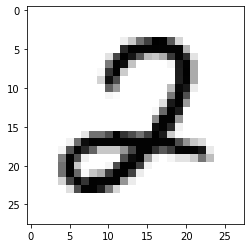

In [6]:
s = X_train.iloc[4].values    #Gives the values of 5th tuple of the dataframe
s.shape = (28,28)             #Converts the tuple into a 2D array of 28X28
pt.imshow(255-s, cmap='gray') #pt comes from matplot lib imported above
pt.show()

Create and train the RF model

In [7]:
#Random Forest Classifier comes from SciKit Learn Library imported above
rf_clf = RandomForestClassifier(max_depth=2, random_state=0, n_estimators=100)
t0 = time.time()
rf_clf.fit(X_train, y_train)
t1 = time.time()
print("Time taken to train RFC:", t1-t0)

Time taken to train RFC: 1.9714558124542236


Lets try some sample predictions and check their accuracy manually:

In [8]:
test_data_point = 23 #For checking a random (23rd) tuple/datapoint in our training data set
print("The RF model predicts this value to be:", rf_clf.predict([X_test.iloc[test_data_point]]))

The RF model predicts this value to be: [7]


In [22]:
#Let us check what is the actual test data point hand written digit


Let us now predict the results for complete test data set and check its accuracy by comparing predictions with acutal values

In [10]:
#Get the predictions over complete test data set using RF Classifier
predictions = rf_clf.predict(X_test)

In [11]:
#Compare predictions with actual values to get the accuracy of our model
actuals = y_test.values
result = (actuals==predictions)
correct_pred = 0
for r in result:
  if(r==True):
    correct_pred += 1

acc = round(100*correct_pred/9999, 2)
acc

62.43

Accuracy check using metrics library utility

In [12]:
#sklearn has inbuilt library to calculate accuracy
from sklearn import metrics
pscore = metrics.accuracy_score(y_test, predictions)
print("Random Forest Classifier Accuracy:", round(100*pscore, 2),"%")

Random Forest Classifier Accuracy: 62.43 %


**Classification using Support Vector Machine Classifier**

In [36]:
#Import SVC from sklearn
from sklearn.svm import SVC
sv_clf = SVC(gamma='auto', verbose=True)
t0 = time.time()
sv_clf.fit(X_train, y_train) #Re-use the X_train and y_train created above
t1 = time.time()
print("Time taken to train SVC:", t1-t0)

[LibSVM]Time taken to train SVC: 1041.5941321849823


In [37]:
predictions = sv_clf.predict(X_test)
t2 = time.time()
print("Time taken to predict using SVC:", t2-t1)

Time taken to predict using SVC: 265.5771734714508


In [38]:
pscore = metrics.accuracy_score(y_test, predictions)
print("Support Vector Classifier Accuracy:", round(100*pscore, 2),"%")

Support Vector Classifier Accuracy: 11.35 %


Gives a very poor accuracy of 11.35 %

**Classification using Dense Neural Network**

In [13]:
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Dense

In [14]:
# Neural network
model = Sequential()
model.add(Dense(32, input_dim=784, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [15]:
#Check the network architecture
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 26,506
Trainable params: 26,506
Non-trainable params: 0
_________________________________________________________________


In [16]:
y_train_nn = pd.DataFrame(columns=[list(range(0,10))])

for i, label in tn(enumerate(y_train)):
  y_train_nn.loc[i, label] = 1
y_train_nn.fillna(0, inplace=True)

print(y_train_nn.shape)
y_train_nn.head()
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  This is separate from the ipykernel package so we can avoid doing imports until



(19999, 10)


,0,1,2,3,4,5,6,7,8,9
0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,1,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0


In [17]:
history = model.fit(X_train, y_train_nn, epochs=100, batch_size=64)

Epoch 1/100
313/313 [==============================] - 1s 2ms/step - loss: 3.7712 - accuracy: 0.4709
Epoch 2/100
313/313 [==============================] - 1s 2ms/step - loss: 1.0261 - accuracy: 0.7174
Epoch 3/100
313/313 [==============================] - 1s 2ms/step - loss: 0.6870 - accuracy: 0.8116
Epoch 4/100
313/313 [==============================] - 1s 2ms/step - loss: 0.5530 - accuracy: 0.8512
Epoch 5/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.8711
Epoch 6/100
313/313 [==============================] - 1s 2ms/step - loss: 0.4255 - accuracy: 0.8869
Epoch 7/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3814 - accuracy: 0.8974
Epoch 8/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.9045
Epoch 9/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.9087
Epoch 10/100
313/313 [==============================] - 1s 2ms/step - loss: 0.3039 - accura

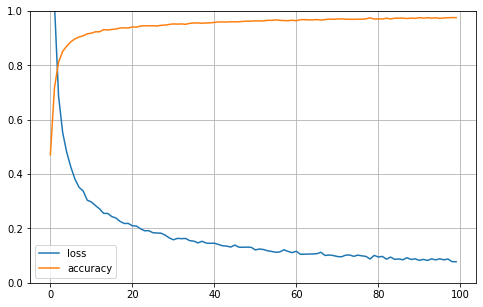

In [18]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
pt.grid(True)
pt.gca().set_ylim(0, 1) 
pt.show()

In [19]:
y_pred = model.predict(X_test)
#Converting predictions to label
predictions = []
for i in range(len(y_pred)):
    predictions.append(np.argmax(y_pred[i]))
#print(predictions)

In [20]:
pscore = metrics.accuracy_score(y_test, predictions)
print("Neural Network Model Accuracy:", round(100*pscore, 2),"%")

Neural Network Model Accuracy: 92.53 %


In [21]:
TestX = np.array(X_test.iloc[test_data_point])[np.newaxis]
np.argmax(model.predict(TestX))

4

# **Some more magic now!**

In [3]:
#!pip install pycaret
from pycaret.classification import *

The setup() function initializes the environment in pycaret and creates the transformation pipeline to prepare the data for modeling and deployment.

In [15]:
exp_mclf101 = setup(data = df_train, target = '6', session_id=123) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Multiclass
2,Label Encoded,"0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9"
3,Original Data,"(19999, 785)"
4,Missing Values,False
5,Numeric Features,596
6,Categorical Features,188
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


Comparing all models to evaluate performance is the recommended starting point for modeling once the setup is completed (unless you exactly know what kind of model you need, which is often not the case). This function trains all models in the model library and scores them using stratified cross validation for metric evaluation. The output prints a score grid that shows average Accuracy, Recall, Precision, F1 and Kappa accross the folds (10 by default) of all the available models in the model library.

In [ ]:
compare_models(fold = 3)

IntProgress(value=0, description='Processing: ', max=71)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,06:14:43
Status,. . . . . . . . . . . . . . . . . .,Fitting Fold 1 of 3
Estimator,. . . . . . . . . . . . . . . . . .,CatBoost Classifier
ETC,. . . . . . . . . . . . . . . . . .,Calculating ETC


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Light Gradient Boosting Machine,0.9549,0.0,0.9545,0.9551,0.9549,0.9498,0.9498,51.8997
1,Extra Trees Classifier,0.9513,0.0,0.9506,0.9514,0.9512,0.9458,0.9459,4.2594
2,K Neighbors Classifier,0.9435,0.0,0.9423,0.9446,0.9433,0.9372,0.9373,1.9359
3,Gradient Boosting Classifier,0.9269,0.0,0.9261,0.9272,0.9268,0.9188,0.9188,415.5192
4,Extreme Gradient Boosting,0.9264,0.0,0.9254,0.9266,0.9263,0.9182,0.9183,195.1934
5,Random Forest Classifier,0.9041,0.0,0.9022,0.9044,0.9037,0.8933,0.8935,0.4491
6,Logistic Regression,0.8717,0.0,0.8693,0.8717,0.8714,0.8574,0.8574,8.4390
7,SVM - Linear Kernel,0.8640,0.0,0.8619,0.8708,0.8645,0.8488,0.8496,11.6303
8,Linear Discriminant Analysis,0.8491,0.0,0.8469,0.8517,0.8489,0.8322,0.8325,7.4273
9,Ridge Classifier,0.8372,0.0,0.8338,0.8386,0.8355,0.8189,0.8195,0.9354


While compare_models() is a powerful function and often a starting point in any experiment, it does not return any trained models. PyCaret's recommended experiment workflow is to use compare_models() right after setup to evaluate top performing models and finalize a few candidates for continued experimentation. As such, the function that actually allows to you create a model is unimaginatively called create_model().

K Nearest Neighbors Classifier

In [ ]:
knn = create_model('knn')

Tune the model: When a model is created using the create_model() function it uses the default hyperparameters. In order to tune hyperparameters, the tune_model() function is used. This function automatically tunes the hyperparameters of a model on a pre-defined search space and scores it using stratified cross validation.

In [ ]:
tuned_knn = tune_model(knn)

Plot the model. Data Visualization.

In [ ]:
plot_model(tuned_knn, plot = 'confusion_matrix')

In [ ]:
plot_model(tuned_knn, plot = 'class_report')

In [ ]:
plot_model(tuned_knn, plot='error')

Before finalizing the model, it is advisable to perform one final check by predicting the test/hold-out set and reviewing the evaluation metrics. If you look at the inforamtion text above, you will see that 30% of the data has been separated out as a test/hold-out sample. All of the evaluation metrics we have seen above are cross validated results based on the training set (70%) only. Now, using our final trained model stored in the tuned_knn variable we will predict against the hold-out sample and evaluate the metrics to see if they are materially different than the CV results.

In [ ]:
predict_model(tuned_knn);

Model finalization is the last step in the experiment.

In [ ]:
final_knn = finalize_model(tuned_knn)

We have now finished the experiment by finalizing the tuned_knn model which is now stored in the final_knn variable. This brings us to the end of our experiment, but one question is still to be asked: What happens when you have more new data to predict? Or what if you want to use this model in some other project? Do you have to go through the entire experiment again? The answer is no. We have the option of saving our trained models. PyCaret's inbuilt function save_model() allows you to save the model along with entire transformation pipeline for later use.

In [ ]:
save_model(final_knn,'Final_KNN_Model_16Oct2020')

To load a saved model at a future date in the same or an alternative environment, we would use PyCaret's load_model() function and then easily apply the saved model on new unseen data for prediction.

In [ ]:
saved_final_knn = load_model('Final_KNN_Model_16Oct2020')

In [ ]:
new_prediction = predict_model(saved_final_knn, data=df_test)
new_prediction.head()

# **Can you try predicting the hand written digit using Logistic Regression?**

Hints:
1. You can use Logistic Regression algorithm from Scikit Learn

 -> from sklearn.linear_model import LogisticRegression

2. You can use lr model from PyCaret

 -> lr = create_model('lr')

Free code for tutorial sponsored by **Yubo AI Labs**

If you liked the content and want more:

Give Yubo AI Labs a 5 star rating at: https://rb.gy/qsrkle

Follow Yubo on Linkedin for latest updates on AI: https://www.linkedin.com/company/hellooyubo/

Like and follow Yubo on FB: https://www.facebook.com/HelloYubo

